In [3]:
import warnings
import numpy as np
import pandas as pd


from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston

warnings.filterwarnings('ignore')

boston = load_boston()

boston.keys()
X.describe() #посмотреть основные метрики
X.head() # просмотр первых 5 строк

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
data = boston["data"]

feature_names = boston["feature_names"]
X = pd.DataFrame(data, columns=feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
target = boston["target"]

y = pd.DataFrame(target, columns=["price"])
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))
pd.DataFrame(X_train_tsne).head()

До:	(404, 13)
После:	(404, 2)


,0,1
0,28.138090,18.375324
1,-9.785578,-4.535539
2,-15.695753,-17.543627
3,37.924854,13.517046
4,-8.786393,3.995167


             0          1
0    28.138090  18.375324
1    -9.785578  -4.535539
2   -15.695753 -17.543627
3    37.924854  13.517046
4    -8.786393   3.995167
..         ...        ...
399  -7.871442   4.985711
400 -13.531818  -4.034057
401 -17.871710 -23.890985
402  37.071964  11.377393
403 -10.998275   8.843811

[404 rows x 2 columns]


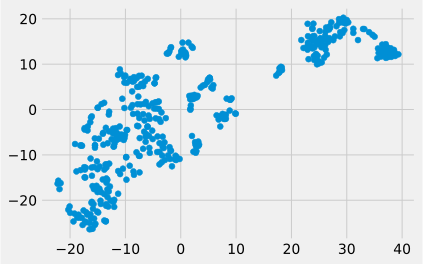

In [72]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

plt.style.use('fivethirtyeight')

import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

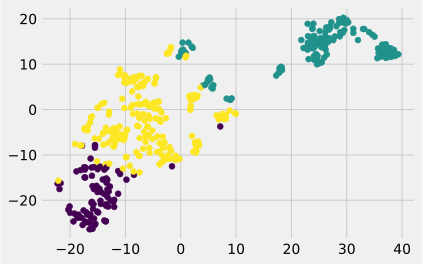

In [49]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [58]:
print("Mean of CRIM")
print('Кластер 1: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 3: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Mean of CRIM
Кластер 1: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [82]:
print("Mean of price")
print(f'Кластер 1: {y_train[labels_train == 0].mean()}')
print(f'Кластер 2: {y_train[labels_train == 1].mean()}')
print(f'Кластер 3: {y_train[labels_train == 2].mean()}')

Mean of price
Кластер 1: price    27.788372
dtype: float64
Кластер 2: price    16.165354
dtype: float64
Кластер 3: price    24.958115
dtype: float64
